In [1]:
#Importing all packages needed for data frame cleaning and PCA
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
import missingno as msno

In [2]:
#Creating data frame from CSV using pandas 
churn = pd.read_csv('churn_raw_data.csv', index_col = 0)

In [3]:
#Getting a first look at our data frame.
churn.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
#Further inspecting our data frame. We notice that there are values missing from a few of our columns already by
#looking at the count.
churn.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
#Checking DataTypes for each columns variables.
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

In [6]:
#Looking at total amounts of missing data for each column.
churn.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [7]:
#Checking to make sure each row is unique.
print(churn.duplicated().value_counts())

False    10000
Name: count, dtype: int64


<Axes: >

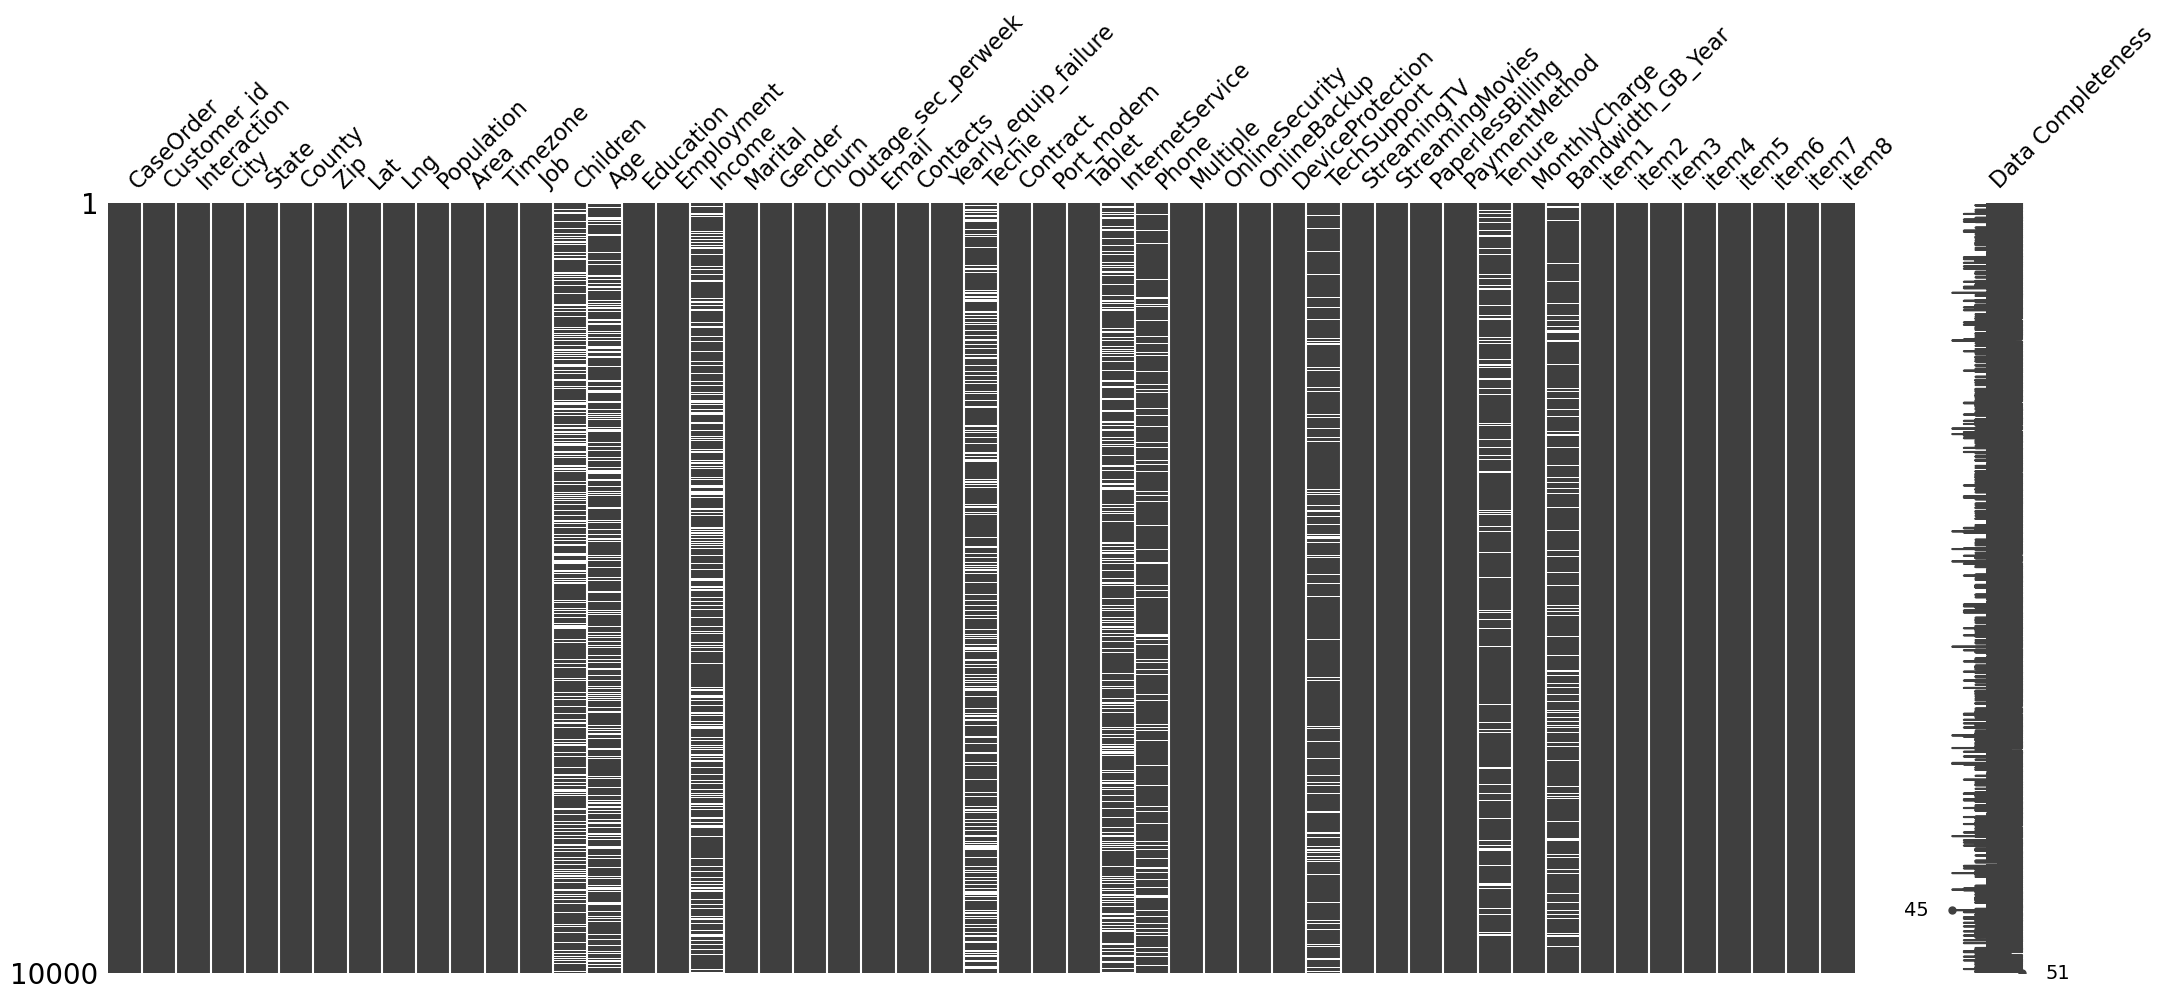

In [8]:
#Generating an msno matrix to visualize missing values. 
msno.matrix(churn, labels = True)

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

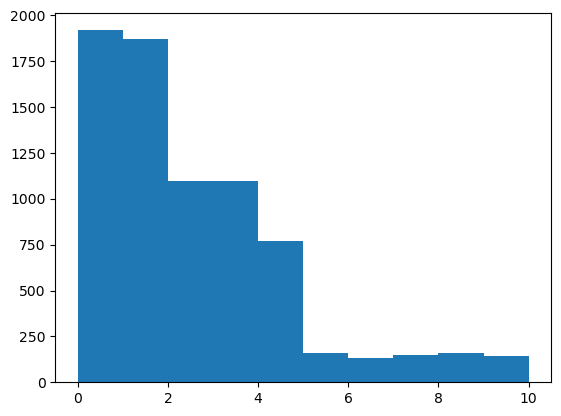

In [9]:
#Examining distribution for values in Children.
plt.hist(churn['Children'])

In [10]:
#Filling missing values in Children with the median due to skewed distribution.
churn['Children'].fillna(churn['Children'].median(), inplace=True)

(array([853., 756., 714., 739., 708., 739., 728., 728., 761., 799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

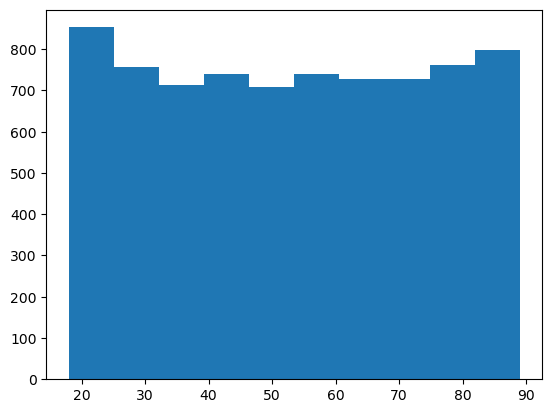

In [11]:
#Distribution of values for Age.
plt.hist(churn['Age'])

In [12]:
#Filling missing values with the mean.
churn['Age'].fillna(churn['Age'].mean(), inplace = True)
churn['Age']=round(churn['Age'])

In [13]:
#Checking to make sure values were filled in the Children and Age Columns.
print(churn[['Children','Age']].isnull().sum())

Children    0
Age         0
dtype: int64


(array([2.912e+03, 2.642e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

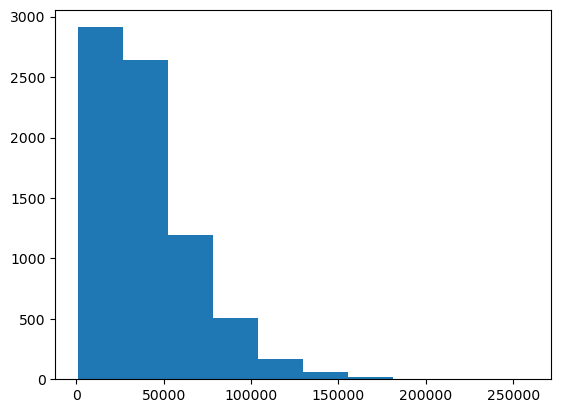

In [14]:
#Distribution of values for income
plt.hist(churn['Income'])

In [15]:
#Filling missing values of Income with the median
churn['Income'].fillna(churn['Income'].median(), inplace = True)

(array([1031., 2062., 1087.,  255.,   98.,  370.,  844., 1399., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

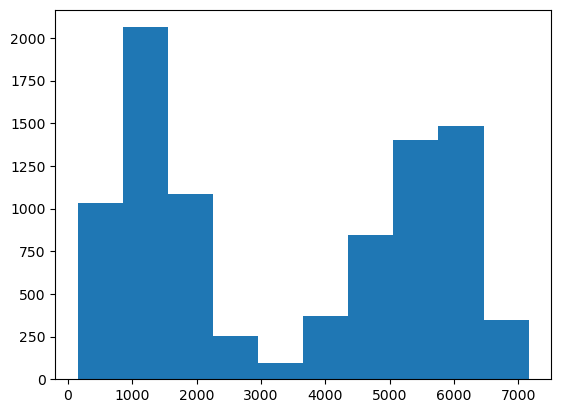

In [16]:
#Distribution values for bandwidth
plt.hist(churn['Bandwidth_GB_Year'])

In [17]:
#Filling missing values with the mean
churn['Bandwidth_GB_Year'].fillna(churn['Bandwidth_GB_Year'].median, inplace = True)

(array([2337., 1473.,  568.,  132.,   30.,  221.,  540.,  870., 1330.,
        1568.]),
 array([ 1.00025934,  8.10016141, 15.20006347, 22.29996554, 29.3998676 ,
        36.49976967, 43.59967174, 50.6995738 , 57.79947587, 64.89937793,
        71.99928   ]),
 <BarContainer object of 10 artists>)

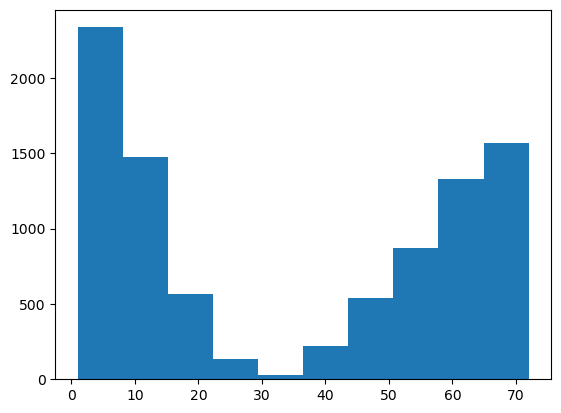

In [18]:
#Checking distribution of tenure
plt.hist(churn['Tenure'])

In [19]:
#filling missing values with the mean
churn['Tenure'].fillna(churn['Tenure'].mean(), inplace = True)
churn['Tenure']=round(churn['Tenure'])

(array([7.243e+03, 1.178e+03, 7.340e+02, 4.610e+02, 2.090e+02, 1.050e+02,
        3.500e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([-0.67603783,  0.09897726,  0.87399236,  1.64900745,  2.42402254,
         3.19903763,  3.97405273,  4.74906782,  5.52408291,  6.299098  ,
         7.07411309]),
 <BarContainer object of 10 artists>)

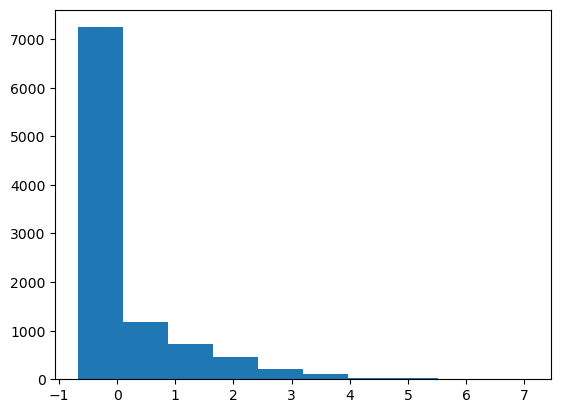

In [20]:
#Checking for outliers in Population.
churn['PopulationZScore']=stats.zscore(churn['Population'])
plt.hist(churn['PopulationZScore'])

(array([2.912e+03, 5.132e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([-1.51597813, -0.47276544,  0.57044725,  1.61365994,  2.65687263,
         3.70008532,  4.74329801,  5.7865107 ,  6.82972339,  7.87293608,
         8.91614877]),
 <BarContainer object of 10 artists>)

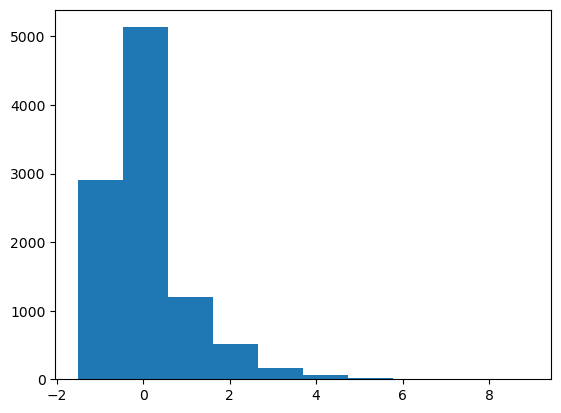

In [21]:
#Checking for outliers in Income
churn['IncomeZScore']=stats.zscore(churn['Income'])
plt.hist(churn['IncomeZScore'])

(array([ 176., 2605., 5237., 1428.,   54.,    0.,    9.,  144.,  282.,
          65.]),
 array([-1.82213355, -1.13325203, -0.44437051,  0.24451101,  0.93339253,
         1.62227405,  2.31115557,  3.00003709,  3.68891861,  4.37780014,
         5.06668166]),
 <BarContainer object of 10 artists>)

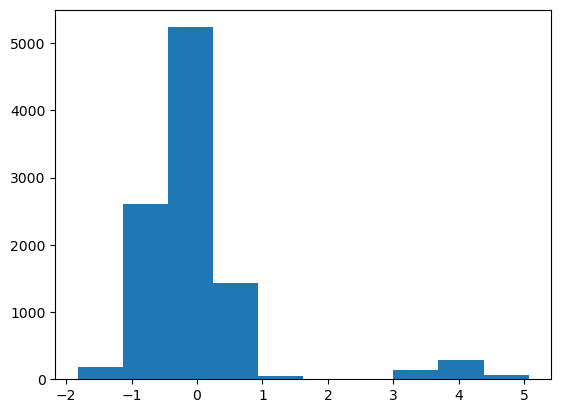

In [22]:
#Checking for outliers in Outage
churn['Outage_sec_perweekZScore']=stats.zscore(churn['Outage_sec_perweek'])
plt.hist(churn['Outage_sec_perweekZScore'])

In [23]:
#Leaving Outage_sec_week alone because the outliers are frequent enough to probably be true.

(array([  23.,  140.,  501., 1317., 3675., 2328., 1296.,  554.,  151.,
          15.]),
 array([-3.64075402, -2.9136608 , -2.18656759, -1.45947438, -0.73238116,
        -0.00528795,  0.72180526,  1.44889848,  2.17599169,  2.9030849 ,
         3.63017812]),
 <BarContainer object of 10 artists>)

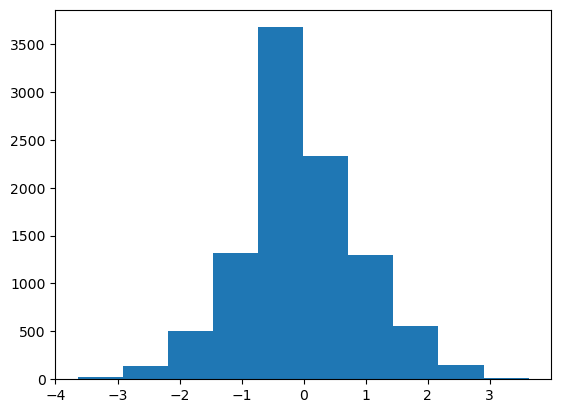

In [24]:
#Outliers detection in Email
churn['EmailZScore']=stats.zscore(churn['Email'])
plt.hist(churn['EmailZScore'])

(array([3.680e+03, 3.675e+03, 1.872e+03, 0.000e+00, 6.080e+02, 1.370e+02,
        0.000e+00, 2.000e+01, 5.000e+00, 3.000e+00]),
 array([-1.0058517 , -0.29764793,  0.41055584,  1.11875961,  1.82696339,
         2.53516716,  3.24337093,  3.9515747 ,  4.65977847,  5.36798224,
         6.07618601]),
 <BarContainer object of 10 artists>)

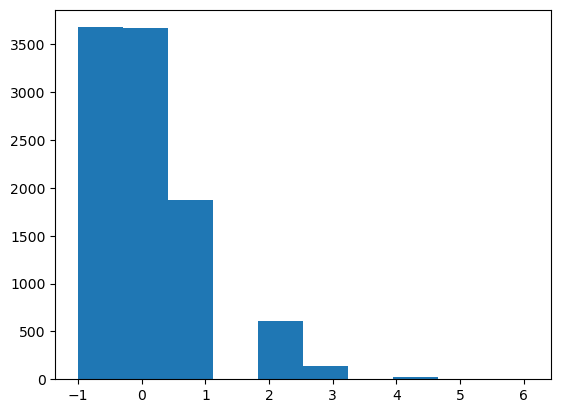

In [25]:
#Outlier detection in Contacts
churn['ContactsZScore']=stats.zscore(churn['Contacts'])
plt.hist(churn['ContactsZScore'])

In [26]:
#Leaving Contacts values alone because the numbers are small and some customers require more attention.

(array([6.727e+03, 2.670e+03, 0.000e+00, 5.090e+02, 8.600e+01, 0.000e+00,
        7.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.62586353,  0.31764933,  1.26116219,  2.20467505,  3.14818792,
         4.09170078,  5.03521364,  5.9787265 ,  6.92223936,  7.86575222,
         8.80926509]),
 <BarContainer object of 10 artists>)

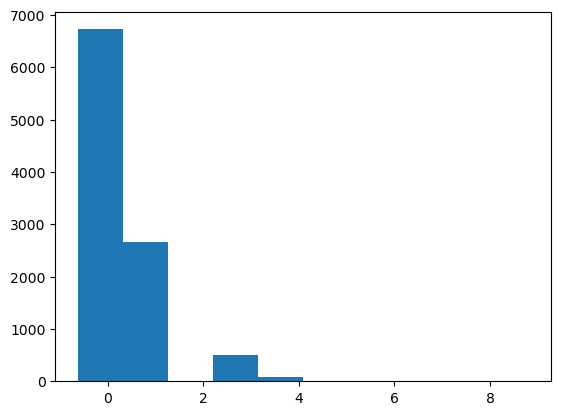

In [27]:
#Outliers in Yearly_Equipment_Failure
churn['Yearly_equip_failureZScore']=stats.zscore(churn['Yearly_equip_failure'])
plt.hist(churn['Yearly_equip_failureZScore'])

(array([2443., 1402.,  542.,  123.,  961.,  212.,  524.,  844., 1310.,
        1639.]),
 array([-1.32841674, -1.0464871 , -0.76455745, -0.48262781, -0.20069817,
         0.08123147,  0.36316112,  0.64509076,  0.9270204 ,  1.20895004,
         1.49087969]),
 <BarContainer object of 10 artists>)

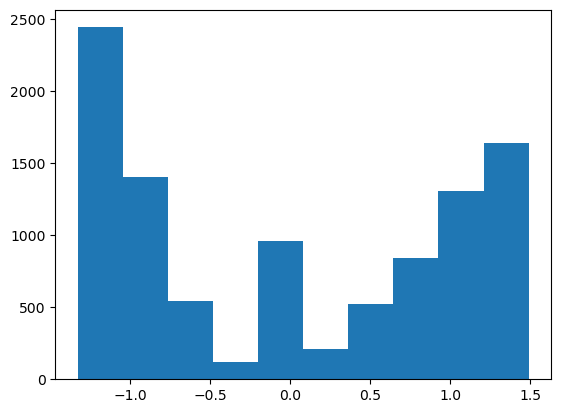

In [28]:
#Checking for outliers in tenure
churn['TenureZScore']=stats.zscore(churn['Tenure'])
plt.hist(churn['TenureZScore'])

(array([ 219.,  947., 1917., 2272., 1809., 1151.,  968.,  520.,  187.,
          10.]),
 array([-2.22856466, -1.67847193, -1.12837919, -0.57828646, -0.02819372,
         0.52189901,  1.07199175,  1.62208448,  2.17217722,  2.72226995,
         3.27236269]),
 <BarContainer object of 10 artists>)

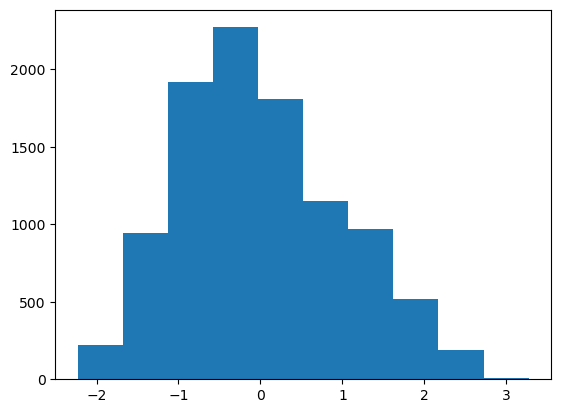

In [29]:
#Outliers in MonthlyCharge
churn['MonthlyChargeZScore']=stats.zscore(churn['MonthlyCharge'])
plt.hist(churn['MonthlyChargeZScore'])

In [30]:
#There does not appear to be any drastic outliers in the data frame that need cleaning.

In [31]:
#Checking the unique values of Techie
churn['Techie'].unique()

array(['No', 'Yes', nan], dtype=object)

In [32]:
#Replicating the variable to prepare it to go from categorical to numerical
churn['Techie_numeric']=churn['Techie']
#Setting up a dictionary to convert variables from categorical to numerical
dict_techie={"Techie_numeric":{"No":0,"Yes":1}}
#Replacing the variables 
churn.replace(dict_techie, inplace=True)

In [33]:
#filling missing values with the mode because variable is categorical
churn['Techie_numeric'] =churn['Techie_numeric'].fillna(churn['Techie_numeric'].mode()[0])

In [34]:
#Checking unique values
churn['InternetService'].unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [35]:
#Repeating code from cell 33
churn['InternetService_numeric']=churn['InternetService']
dict_InternetService={"InternetService_numeric":{"Fiber Optic":0,"DSL":1}}
churn.replace(dict_InternetService, inplace=True)

In [36]:
#filling missing values with the mode because InternetService is categorical
churn['InternetService_numeric'] =churn['InternetService_numeric'].fillna(churn['InternetService_numeric'].mode()[0])

In [37]:
#Checking unique values
churn['Phone'].unique()

array(['Yes', 'No', nan], dtype=object)

In [38]:
#Repeating code from cell 33
churn['Phone_numeric']=churn['Phone']
dict_Phone={"Phone_numeric":{"Yes":0,"No":1}}
churn.replace(dict_Phone, inplace=True)

In [39]:
#filling missing values with the mode because variable is categorical
churn['Phone_numeric'] =churn['Phone_numeric'].fillna(churn['Phone_numeric'].mode()[0])

In [40]:
#Checking unique values
churn['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [41]:
#Repeating code from cell 33
churn['TechSupport_numeric']=churn['TechSupport']
dict_TechSupport={"TechSupport_numeric":{"No":0, "Yes":1}}
churn.replace(dict_TechSupport, inplace=True)

In [42]:
#filling missing values with the mode because InternetService is categorical
churn['TechSupport_numeric'] =churn['TechSupport_numeric'].fillna(churn['TechSupport_numeric'].mode()[0])

In [43]:
#Checking results to make sure new columns were added correctly. 
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CaseOrder                   10000 non-null  int64  
 1   Customer_id                 10000 non-null  object 
 2   Interaction                 10000 non-null  object 
 3   City                        10000 non-null  object 
 4   State                       10000 non-null  object 
 5   County                      10000 non-null  object 
 6   Zip                         10000 non-null  int64  
 7   Lat                         10000 non-null  float64
 8   Lng                         10000 non-null  float64
 9   Population                  10000 non-null  int64  
 10  Area                        10000 non-null  object 
 11  Timezone                    10000 non-null  object 
 12  Job                         10000 non-null  object 
 13  Children                    10000 no

<Axes: >

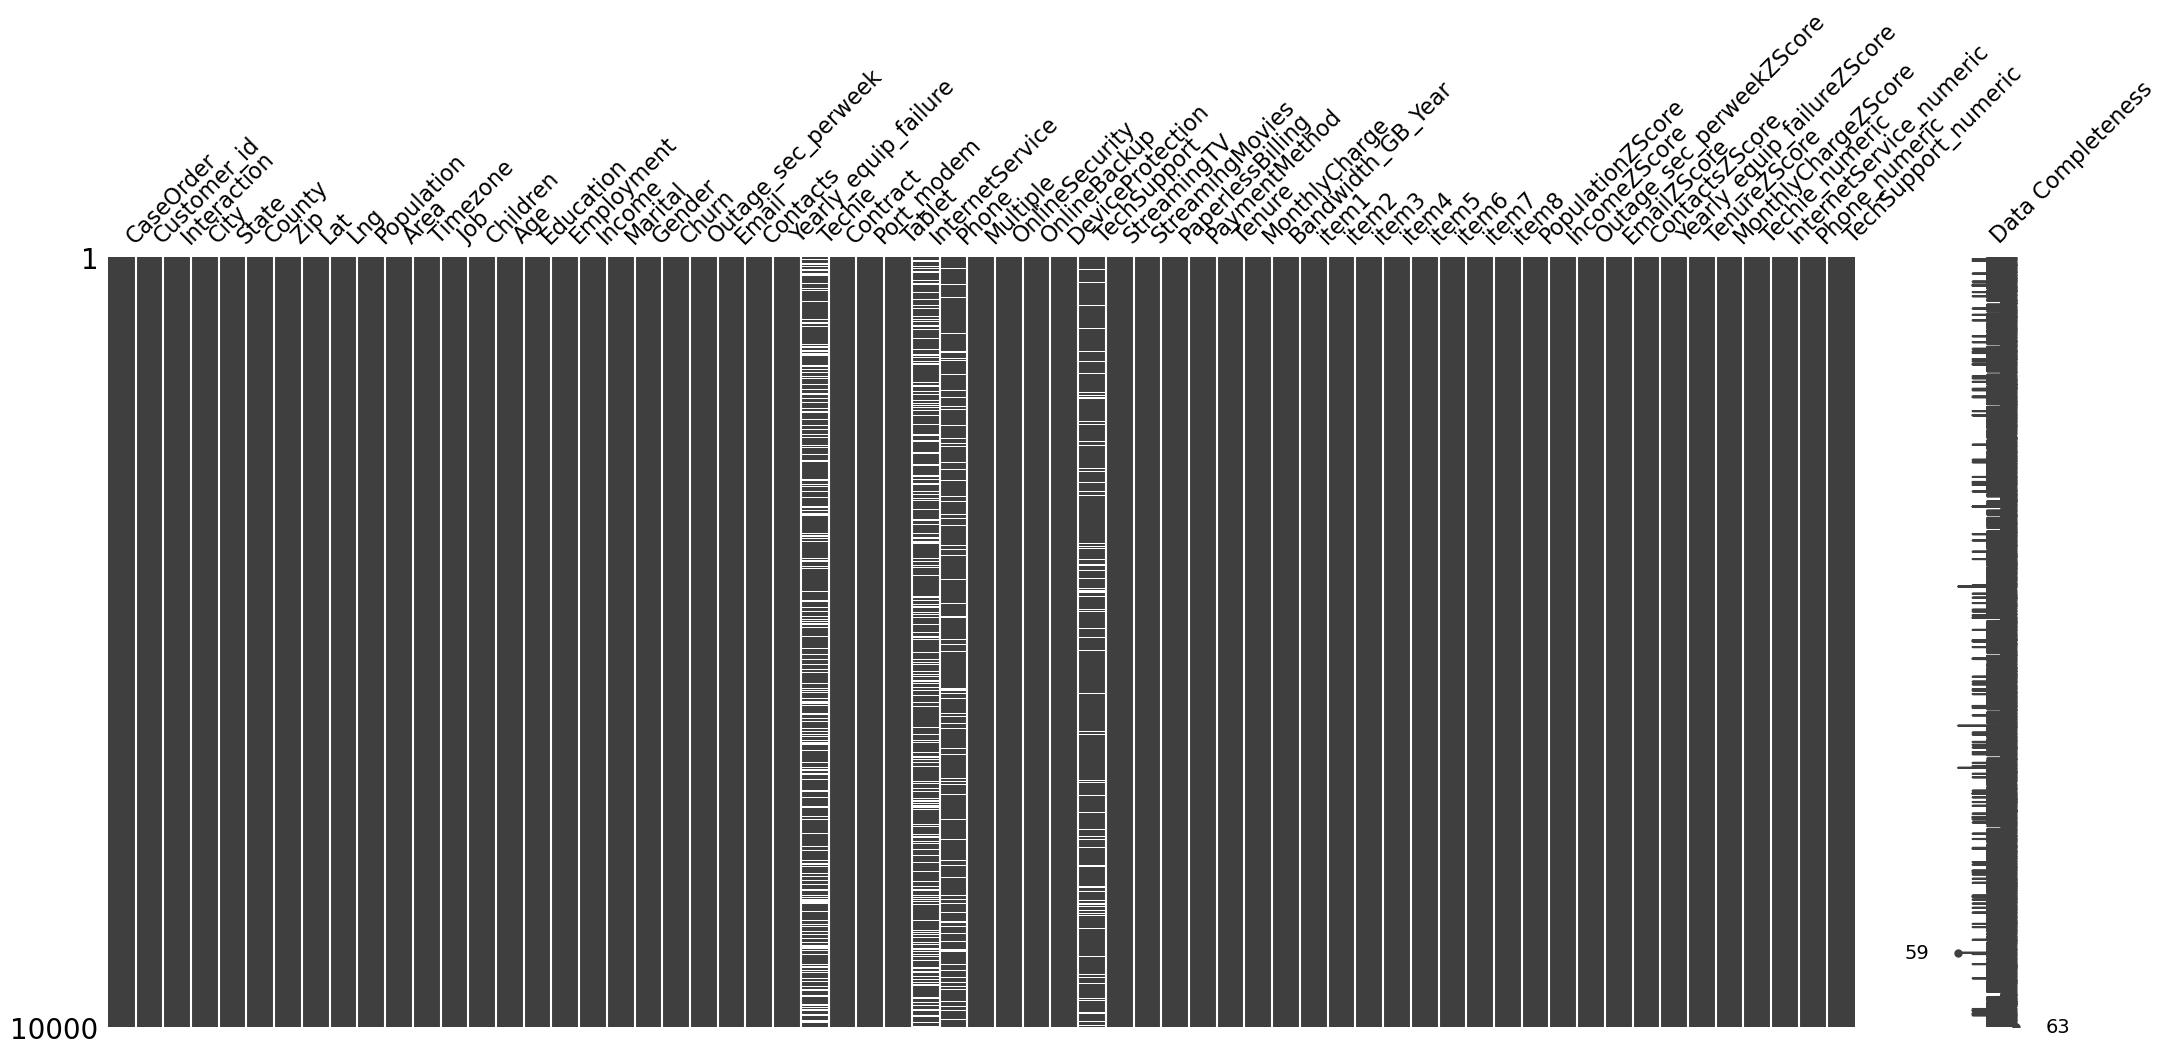

In [44]:
#Checking to make sure all variables aside from original unconverted object types are filled
msno.matrix(churn, labels = True)

In [45]:
#Creating a new data frame for my PCA
c=churn[['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure',
        'MonthlyCharge']]

In [46]:
#Normalizing data frame c
c_normalized = (c-c.mean())/c.std()

In [47]:
#creating pca
pca = PCA(n_components=c.shape[1])

In [48]:
#Checking number of components
pca.fit(c_normalized)

PCA(n_components=10)

In [49]:
#Creating my pca loadings
c_pca= pd.DataFrame(pca.transform(c_normalized),
                   columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [50]:
#creating my pca loadings
loadings = pd.DataFrame(pca.components_.T, 
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'],
index = c.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Population,-0.055625,-0.308422,-0.282343,-0.238031,0.546333,0.427166,0.306076,-0.313419,-0.304204,0.000659
Children,0.017544,0.567210,-0.215883,0.089194,-0.105507,0.363064,-0.113048,0.341211,-0.592665,0.000040
Age,-0.044977,-0.379185,0.389635,0.053354,-0.350653,0.374051,-0.491099,-0.308959,-0.290754,0.124461
Income,-0.001643,0.231749,0.193816,0.674249,0.439665,0.336287,-0.133346,-0.137232,0.326781,-0.065726
Outage_sec_perweek,0.708215,0.021626,0.003802,-0.010539,0.073262,0.025260,0.032138,0.011922,0.041903,0.699216
Email,0.050534,-0.310032,-0.526958,-0.088544,0.007964,0.281781,-0.476586,0.403666,0.377905,-0.058703
Contacts,-0.005929,-0.440574,0.212244,0.344160,-0.161103,0.203744,0.513992,0.552487,-0.073812,0.004564
Yearly_equip_failure,0.063448,0.283107,0.376767,-0.533584,-0.122415,0.513772,0.189803,0.065935,0.393557,-0.122281
Tenure,0.008543,-0.081087,0.468590,-0.252466,0.570521,-0.213794,-0.325669,0.433604,-0.206816,-0.044584
MonthlyCharge,0.697364,-0.090788,0.004605,0.055485,-0.047548,-0.038610,-0.011741,-0.101806,-0.131178,-0.686207


In [51]:
#Selecting PCs using a scree plot
cov_matrix= np.dot(c_normalized.T, c_normalized)/c.shape[0]
eigenvalues= [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))for eigenvector in pca.components_]

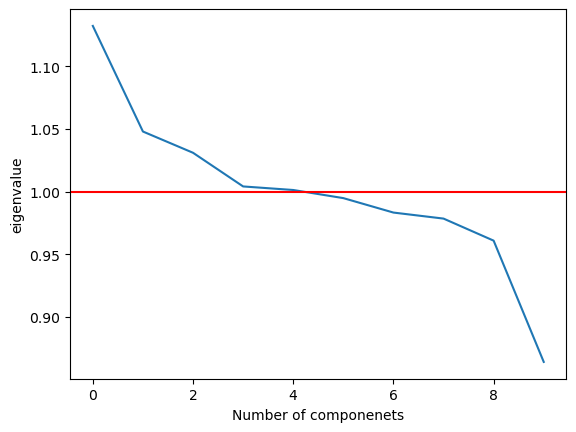

In [52]:
plt.plot(eigenvalues)
plt.xlabel('Number of componenets')
plt.ylabel('eigenvalue')
plt.axhline(y= 1,color="red")
plt.show()

In [53]:
churn.to_csv(r'C:\Users\gmchi\Documents\WGU Stuff\churnclean.csv')